In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
# %matplotlib notebook
%matplotlib tk
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

# plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
media_dir = '/is/ei/fleeb/workspace/media/hybrid/results'

In [3]:
M = Hybrid_Controller(media_dir).sort_by('date')

Found 59 runs


In [4]:
M.clear_filters()
pass

In [5]:
M.prep_info(name='model.pth.tar')

M.load_into('eval.pth.tar')

Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs


In [6]:
def _get_stats(run):
    if 'eval' in run:
        run.stats = {
            'FID-prior': run.eval['FID-prior'],
            
            
#             'DCI-inf': run.eval['DCI']['informativeness_test'],
#             'DCI-cmp': run.eval['DCI']['completeness'],
        }
        
        if 'FID-hyb' in run.eval and run.eval['FID-hyb'] is not None:
            run.stats.update({
                'FID-hyb': run.eval['FID-hyb'],
                'FID-rec': run.eval['FID-rec'],
            })
        
        if 'IRS' in run.eval and run.eval['IRS'] is not None:
            run.stats.update({
                
                'IRS': run.eval['IRS']['IRS'],
                'DCI-dis': run.eval['DCI']['disentanglement'],
            })
M.map(_get_stats, safe=True)

M.filter(lambda r: 'stats' in r and len(r.stats) and 'FID-hyb' in r.stats)
pass

M.store_selection('done')


In [ ]:
'3dshapes-fvae_0009-6027505-03_200129-125156'

In [7]:
M.show('all')

  0) 3dshapes-ae_0002-6026518-03_200129-001602_ckpt40
	Checkpoint: 40 (approx 120000 steps)
	 FID-prior : 51.53
	   FID-hyb : 34.46
	   FID-rec : 23.75
	       IRS : 0.56
	   DCI-dis : 0.28
	output.save_freq - 3000 (5000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 0 (100)

  1) 3dshapes-ae_0002-6026518-03_200129-001602_ckpt50
	Checkpoint: 50 (approx 150000 steps)
	 FID-prior : 51.24
	   FID-hyb : 33.95
	   FID-rec : 22.82
	       IRS : 0.55
	   DCI-dis : 0.28
	output.save_freq - 3000 (5000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 0 (100)

  2) 3dshapes-dvae_0004-6026551-05_200129-003640_ckpt24
	Checkpoint: 24 (approx 72000 steps)
	 FID-prior : 89.82
	   FID-hyb : 83.77
	   FID-rec : 68.20
	       IRS : 0.56
	   DCI-dis : 0.34
	output.save_freq - 3000 (5000)
	training.val_freq - 3000 (5000)
	model.prob - 0.1 (0.5)

  3) 3dshapes-dvae_0004-6026551-06_200129-003638_ckpt24
	Checkpoint: 24 (approx 72000 steps)
	 FID-prior : 75.81
	   FID-hyb : 69.75
	   FID-rec 

In [8]:
M.switch_selection('done')
len(M)

55

In [9]:
# M.invert()
# len(M)
# M.show()
# ' '.join(['_'.join(run.name.split('_')[:-1]) for run in M])

In [10]:
plt.close('all')
figaxs = {}

In [11]:
M.map(lambda r: r.meta.job[0], reduce=Counter)

Counter({'2': 18, '4': 14, '0': 14, '7': 2, '9': 2, '18': 3, '3': 2})

In [18]:
M.switch_selection('done')

# M.filter(lambda r: 'arch' in r.meta and r.meta.arch != 'double')

# M.sort_by(lambda runs: util.sort_by(runs, [run.stats['IRS'] for run in runs]))

# M.filter_sel(slice(-10,None,None))
M.filter_min(ckpt=25)

M.filter_models('fwae', 'fvae', 'vae', 'wae')
# M.filter_models('fdwae', 'fdvae', 'dvae', 'dwae', 'dae')
# M.filter_jobs(94, 122)
# M.show('checkpoint', 'unique', )
# M.filter(lambda r: r.stats['DCI-dis'] > 0.75)

# M.sort_by(lambda runs: util.sort_by(runs, [run.stats['FID-rec'] for run in runs]))
M.sort_by(lambda runs: util.sort_by(runs, [run.stats['FID-hyb'] for run in runs]))
# M.sort_by(lambda runs: util.sort_by(runs, [run.stats['DCI-dis'] for run in runs]))

pass

<IPython.core.display.Javascript object>


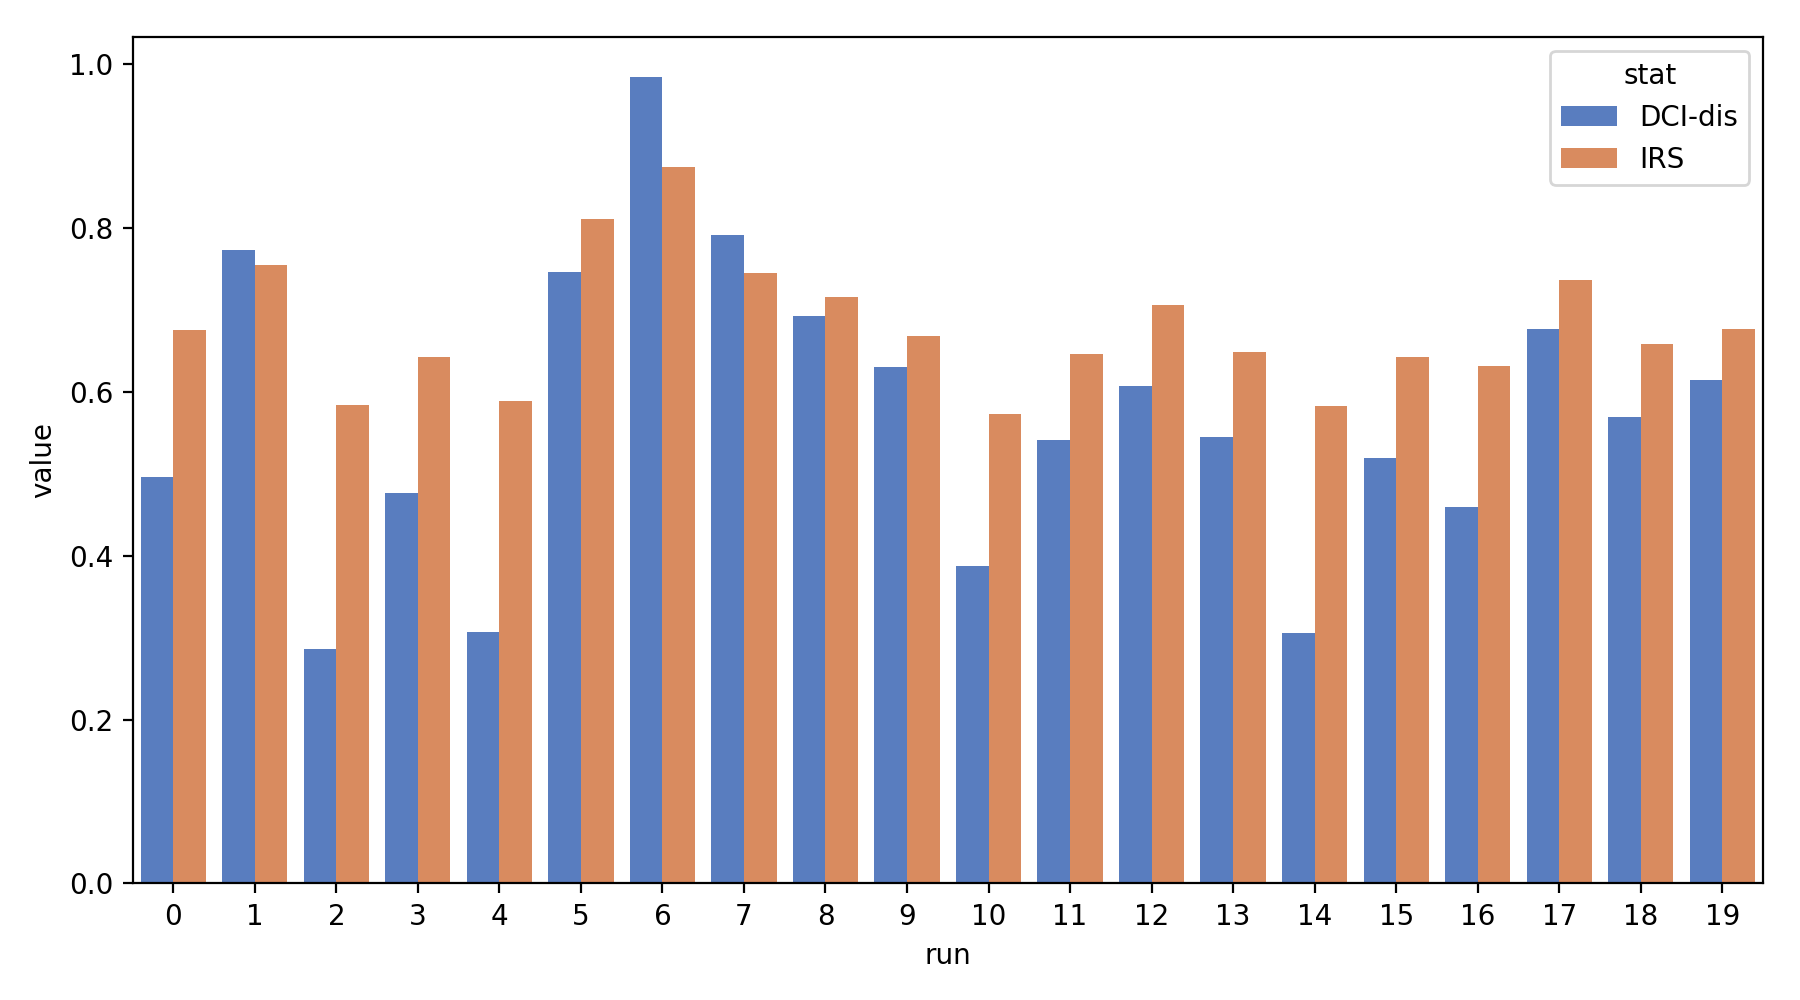

<IPython.core.display.Javascript object>


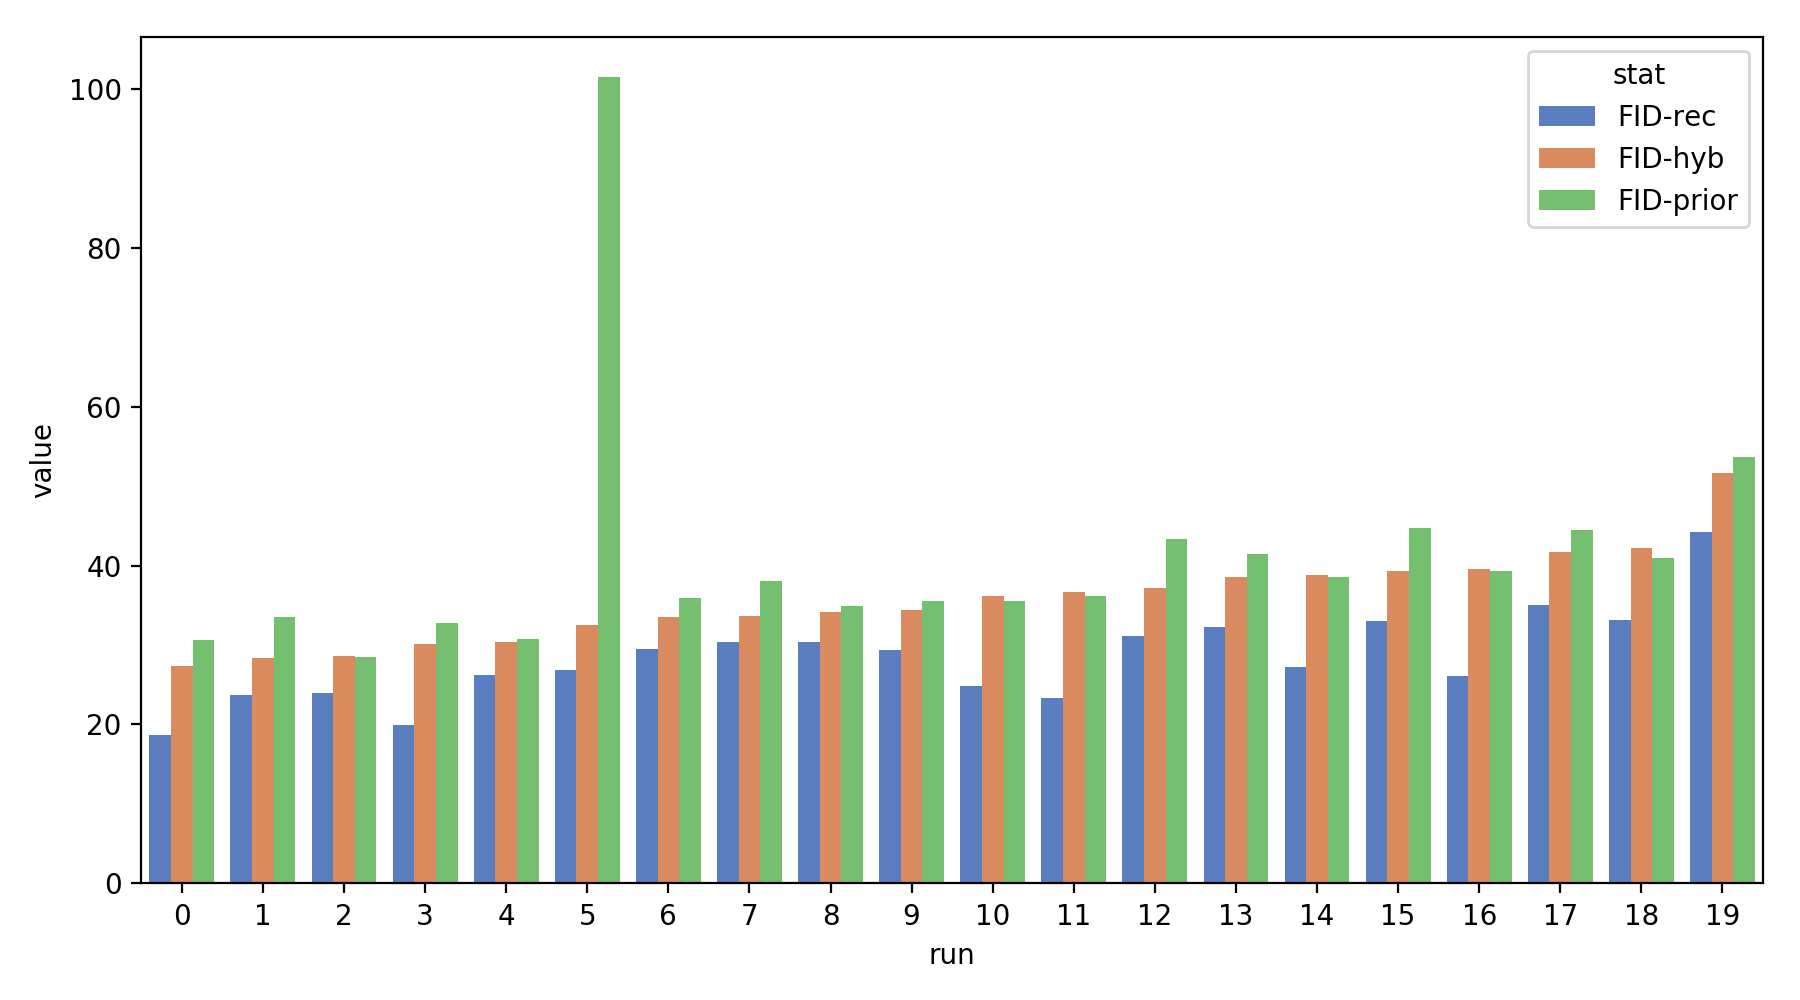

  0) 3dshapes-fwae_0018-6035186-02_200129-232237_ckpt30
	Checkpoint: 30 (approx 150000 steps)
	 FID-prior : 30.57
	   FID-hyb : 27.39
	   FID-rec : 18.70
	       IRS : 0.68
	   DCI-dis : 0.50
	model.norm_type - group (instance)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)
	Generator: double-dec

  1) 3dshapes-fwae_0002-6026518-06_200129-001738_ckpt50
	Checkpoint: 50 (approx 150000 steps)
	 FID-prior : 33.51
	   FID-hyb : 28.37
	   FID-rec : 23.69
	       IRS : 0.76
	   DCI-dis : 0.77
	output.save_freq - 3000 (5000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)
	Generator: double-dec

  2) 3dshapes-wae_0002-6026518-02_200129-001602_ckpt50
	Checkpoint: 50 (approx 150000 steps)
	 FID-prior : 28.49
	   FID-hyb : 28.67
	   FID-rec : 23.99
	       IRS : 0.58
	   DCI-dis : 0.29
	output.save_freq - 3000 (5000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 10000 (100)
	Generator: double-dec

  3) 3dshapes-fwae_0018-60

In [19]:
plt.close('all')
figaxs = {}
fig_stats = {
    'dis':['DCI-dis', 'IRS'], 
#     'fid2': ['FID-rec', 'FID-hyb'],
#     'fid': ['FID-prior', ],
    'fid': [ 'FID-rec', 'FID-hyb', 'FID-prior',],
#              'fid':['FID-rec', ],
            }
for i, (name,stats,) in enumerate(fig_stats.items()):
    if name not in figaxs:
        figaxs[name] = plt.subplots(figsize=(9,5))
    figaxs[name][1].cla()
    figaxs[name] = M.plot_stats(*stats, figax=figaxs.get(name,None))#, color='C{}'.format(i))
    plt.tight_layout()
# M.show('checkpoint', 'unique', manuals=[lambda r: 'Generator: {}'.format(r.config.model.generator._type)])
M.show('all', manuals=[lambda r: 'Generator: {}'.format(r.config.model.generator._type)])

In [14]:
run = M[0]

In [15]:
# run.config.model.generator._type

In [16]:
# run.stats

In [17]:
# run.meta.arch